In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../quora-insincere-questions-classification/train.csv')
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
test = pd.read_csv('../quora-insincere-questions-classification/test.csv')
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [4]:
train.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, string

nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('omw-1.4')
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
# cleaning the data
def clean_text(text):
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    text = nopunct.split(' ')
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(text)) # remove unicode characters
    text = re.sub(r'[^a-zA-Z\s]+', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop]) # remove stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')]) # lemmatization
    text = re.sub(' +', ' ', text) # remove extra spaces
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fioritjx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fioritjx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fioritjx\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
from tqdm import tqdm
tqdm.pandas()
train_clean = train
train_clean['clean_text'] = train['question_text'].progress_apply(clean_text)

100%|██████████████████████████████████████████████████████████████████████| 1306122/1306122 [02:33<00:00, 8534.59it/s]


In [13]:
train_clean.head()

,qid,question_text,target,clean_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...


In [14]:
train_clean.to_csv('../quora-insincere-questions-classification/train_clean.csv')

In [2]:
# if you have already saved the cleaned strings you can start from here
train_clean = pd.read_csv('../quora-insincere-questions-classification/train_clean.csv')
train_clean.head()

,Unnamed: 0,qid,question_text,target,clean_text
0,0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...


In [3]:
from sklearn.model_selection import train_test_split
train_clean = train_clean[['clean_text','target']]
train,test = train_test_split(train_clean,train_size=.8,stratify=train_clean['target'])

In [5]:
train.head()

,clean_text,target
426381,enlightenment meme tricking people losing huma...,0
700503,get monkey pet,1
58188,someone know lyric song atomised laura welsh,0
100059,get money back deducted twice account due tech...,0
242804,according true education,0


In [6]:
train.shape

(1044897, 2)

In [4]:
X_train = train.clean_text
y_train = train.target
X_test = test.clean_text
y_test = test.target
X_train

228533     length interconnecting copper pipe supplied ai...
313214     find best tutorial video transition adobe soft...
1172014    commerce student economic honor without taking...
86351                              would sketch artist wear 
399088     many mark shall score main get nit trichy wara...
                                 ...                        
1300250       role cloud computing service provider company 
940739                         replacement pete pedro india 
767970                             womanism differ feminism 
468721                        people hate idea using tampon 
37112                             constance leto best known 
Name: clean_text, Length: 1044897, dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9, 
                             sublinear_tf=True, smooth_idf=True,
                             strip_accents='unicode', stop_words='english',
                             analyzer='word')
tfidf_train = vectorizer.fit_transform(X_train.astype('U'))
tfidf_test = vectorizer.transform(X_test.astype('U'))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9,
                             strip_accents='unicode', stop_words='english',
                             analyzer='word')
bow_train = vectorizer.fit_transform(X_train.astype('U'))
bow_test = vectorizer.transform(X_test.astype('U'))

In [6]:
X_train.shape

(1044897, 331938)

In [10]:
y_train.shape

(1044897,)

In [48]:
y_train

86285      0
335650     0
51725      0
651650     0
1296821    0
          ..
364209     0
249202     1
172566     1
1249325    0
249115     0
Name: target, Length: 1044897, dtype: int64

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
svm = LinearSVC()
tfidf_cv = cross_validate(svm,tfidf_train,y_train)

In [11]:
tfidf_cv['test_score'].mean()

0.9506937038725563

In [12]:
svm = LinearSVC()
bow_cv = cross_validate(svm,bow_train,y_train)

C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
bow_cv['test_score'].mean()

0.9453611211876053

In [14]:
y_train[y_train==0].shape[0]/y_train.shape[0]

0.9381297869550779

In [19]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
def multi_score(est,X,y):
    pred = est.predict(X)
    return {'accuracy':accuracy_score(y,pred),'precision':precision_score(y,pred),
            'recall':recall_score(y,pred),'f1':f1_score(y,pred)}
tfidf_cv = cross_validate(svm,tfidf_train,y_train,scoring=multi_score,n_jobs=-1)
bow_cv = cross_validate(svm,bow_train,y_train,scoring=multi_score,n_jobs=-1)

In [23]:
print('accuracy: ',tfidf_cv['test_accuracy'].mean())
print('precision: ', tfidf_cv['test_precision'].mean())
print('recall: ',tfidf_cv['test_recall'].mean())
print('f1: ', tfidf_cv['test_f1'].mean())

accuracy:  0.9506937038725563
precision:  0.6585725069943187
recall:  0.4216833779012116
f1:  0.5141331493433597


In [24]:
print('accuracy: ',bow_cv['test_accuracy'].mean())
print('precision: ', bow_cv['test_precision'].mean())
print('recall: ', bow_cv['test_recall'].mean())
print('f1: ', bow_cv['test_f1'].mean())

accuracy:  0.945359207115105
precision:  0.5707950450704862
recall:  0.47101203987725937
f1:  0.5161095182341834


This indicates to me that for this classifier there is very little difference, I will probably use tfidf as it technically has more information

In [28]:
X_sample, X_remainder, y_sample, y_remainder = train_test_split(tfidf_train,y_train,train_size=.01)
X_sample.shape

(10448, 331807)

In [29]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import make_scorer

l2_cv = BayesSearchCV(
                LinearSVC(),
                {
         'penalty': Categorical(['l2']),
         'loss': Categorical(['hinge','squared_hinge']),
         'C': Real(1e-6, 1e+6, prior='log-uniform'),
     },
    n_iter = 100,
    n_points = 10,
    n_jobs = -1,
    random_state = 42,
    scoring = make_scorer(f1_score)# we want to optimize the f1 score
)

l2_opt = l2_cv.fit(X_sample,y_sample)

In [30]:
l1_cv = BayesSearchCV(
                LinearSVC(dual=False,penalty='l1',loss='squared_hinge'),
                {
         'C': Real(1e-6, 1e+6, prior='log-uniform')
     },
    n_iter = 50,
    n_points = 10,
    n_jobs = -1,
    random_state = 42,
    scoring = make_scorer(f1_score)# we want to optimize the f1 score
)

l1_opt = l1_cv.fit(X_sample,y_sample)

C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
l2_opt.best_params_

OrderedDict([('C', 5.5532381279908565), ('loss', 'hinge'), ('penalty', 'l2')])

In [32]:
l2_opt.best_score_

0.22120430331736002

In [33]:
l1_opt.best_params_

OrderedDict([('C', 6.468333147360229)])

In [34]:
l1_opt.best_score_

0.22451672975725406

In [ ]:
l1_opt.best_estimator_.get_params

In [37]:
import numpy as np
f1_score(y_sample,np.ones(y_sample.shape[0]))

0.11951043916486681

It is a bit odd that baysian hyperparameter optimization was unable to improve on the defaults

In [50]:
cross_validate(svm,X_sample,y_sample,scoring=make_scorer(f1_score))['test_score'].mean()

0.34430896306806036

In [51]:
X_sample, X_remainder, y_sample, y_remainder = train_test_split(tfidf_train,y_train,train_size=.05)
from sklearn.model_selection import GridSearchCV
grid = {'C':(.9**np.arange(-10,10))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1,scoring=make_scorer(f1_score))
grid_cv.fit(X_sample,y_sample)

GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([2.86797199, 2.58117479, 2.32305731, 2.09075158, 1.88167642,
       1.69350878, 1.5241579 , 1.37174211, 1.2345679 , 1.11111111,
       1.        , 0.9       , 0.81      , 0.729     , 0.6561    ,
       0.59049   , 0.531441  , 0.4782969 , 0.43046721, 0.38742049])},
             scoring=make_scorer(f1_score))

In [52]:
grid_cv.best_score_

0.38776415003926035

In [53]:
grid_cv.best_params_

{'C': 2.867971990792441}

In [54]:
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation f1'] = grid_cv.cv_results_['mean_test_score']

<AxesSubplot: xlabel='C'>

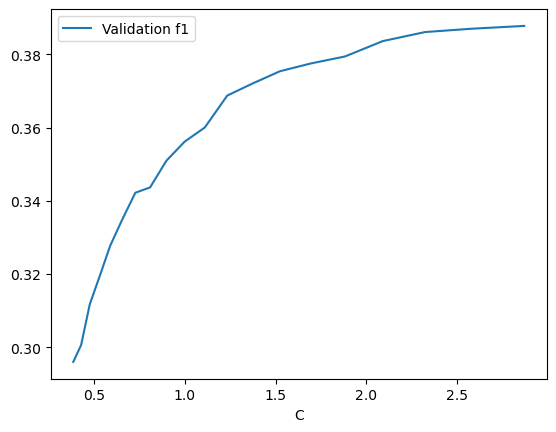

In [55]:
grid_results.plot(x='C',y='Validation f1')

In [56]:
grid = {'C':(2.0**np.arange(0,20))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1,scoring=make_scorer(f1_score))
grid_cv.fit(X_sample,y_sample)
grid_cv.best_score_

0.3976993024236068

<AxesSubplot: xlabel='C'>

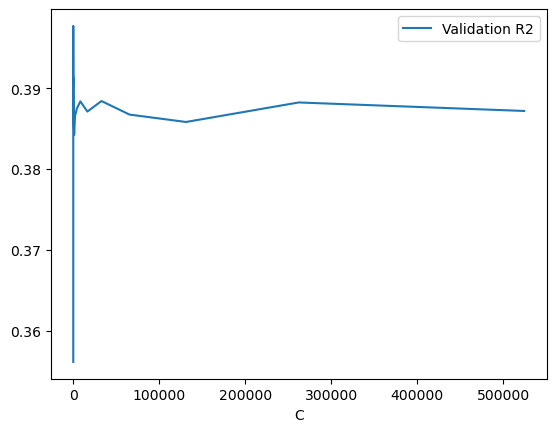

In [57]:
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation f1'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation f1')

In [60]:
grid = {'C':(np.arange(1,20,2))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1,scoring=make_scorer(f1_score))
grid_cv.fit(X_sample,y_sample)
grid_cv.best_score_

0.39740516399771675

<AxesSubplot: xlabel='C'>

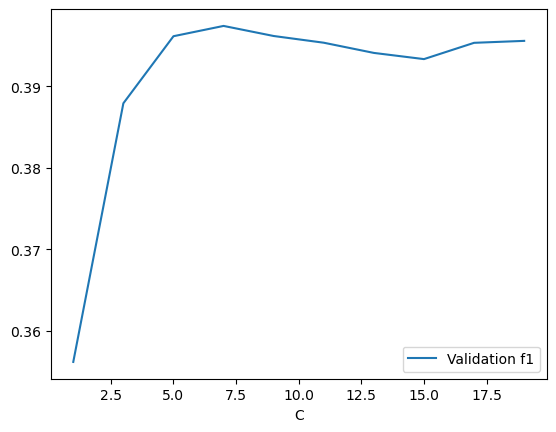

In [61]:
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation f1'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation f1')

<AxesSubplot: xlabel='C'>

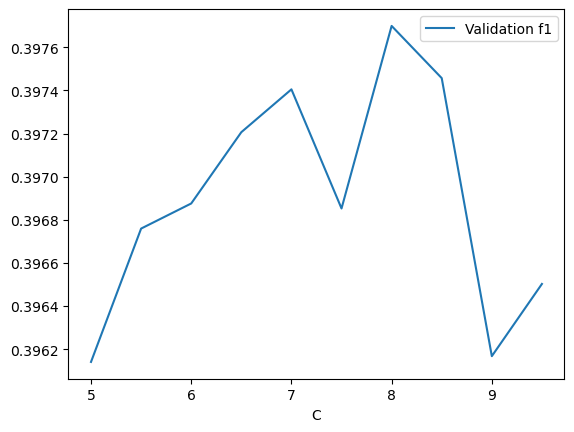

In [62]:
grid = {'C':(np.arange(5,10,.5))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1,scoring=make_scorer(f1_score))
grid_cv.fit(X_sample,y_sample)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation f1'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation f1')

<AxesSubplot: xlabel='C'>

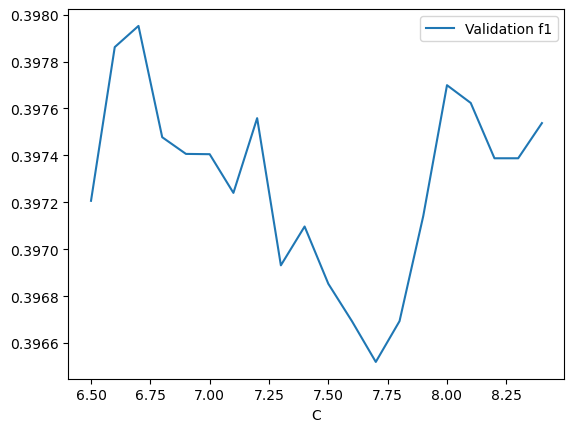

In [69]:
grid = {'C':(np.arange(6.5,8.5,.1))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1,scoring=make_scorer(f1_score))
grid_cv.fit(X_sample,y_sample)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation f1'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation f1')

In [70]:
svm_675 = LinearSVC(C=6.75)
svm_675.fit(tfidf_train,y_train)

LinearSVC(C=6.75)

In [71]:
svm_675.score(tfidf_test,y_test)

0.9446033113216575

In [73]:
make_scorer(f1_score)(svm_675,tfidf_test,y_test)

0.5184199141402377

In [67]:
svm = LinearSVC()
svm.fit(tfidf_train,y_train)
svm.score(tfidf_test,y_test)

0.952121734137238

In [68]:
make_scorer(f1_score)(svm,tfidf_test,y_test)

0.5429563310798466

This is very odd as the grid search indicates that C = 8 should be optimal

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pce = pca.explained_variance_ratio_
pce = pd.Series(pce,index=['PC-'+str(i+1) for i in range(X_train.shape[1])])
pce.head()

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [6]:
from sklearn.decomposition import TruncatedSVD
tSVD = TruncatedSVD(n_components=100) #https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD
tSVD.fit(tfidf_train)

TruncatedSVD(n_components=100)

In [7]:
exp = tSVD.explained_variance_ratio_
exp = pd.Series(exp)
print(exp.head())
exp.sum()

0    0.001198
1    0.001298
2    0.001175
3    0.001127
4    0.001013
dtype: float64


0.05820783567867941

In [8]:
Z_train = tSVD.transform(tfidf_train)

In [9]:
Z_test = tSVD.transform(tfidf_test)

In [7]:
def predict(classifier, X_train, y_train, X_test, y_test):
    result = []
    predict_df = pd.DataFrame()
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    predict_df = predicted

    recall = recall_score(y_test[y_test != -1], predicted[y_test != -1],
                              average="weighted")
    f1 = f1_score(y_test[y_test != -1], predicted[y_test != -1],
                      average="weighted")
    result.append([recall.mean(), f1.mean()])
    return result

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, f1_score
svm = LinearSVC()
predict(svm, tfidf_train, y_train, tfidf_test, y_test)

[[0.951643219446837, 0.9476316316135506]]

In [12]:
predict(svm, Z_train, y_train, Z_test, y_test) #this is strictly worse

[[0.9391023064408077, 0.9187785549622359]]

In [9]:
print('F1: ', f1_score(y_test,yhat))
print('recall : ', recall_score(y_test,yhat))

F1:  0.5362550960978452
recall :  0.4557604256898899


In [10]:
print('F1: ', f1_score(y_test,yhat,average='weighted'))
print('recall : ', recall_score(y_test,yhat,average='weighted'))

F1:  0.9471620117025722
recall :  0.9512297827543306


In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, recall_score
svm = LinearSVC(C=1) #this is the default behavior and should perform about the same as the previous cell
predict(svm, X_train, y_train, X_test, y_test)

[[0.9510881424059718, 0.9450706579836832]]

In [10]:
from sklearn.model_selection import cross_validate
svm = LinearSVC()
svm_cv = cross_validate(svm,X_train,y_train)
svm_cv['test_score'].mean()

0.9505204817149153

<AxesSubplot: xlabel='C'>

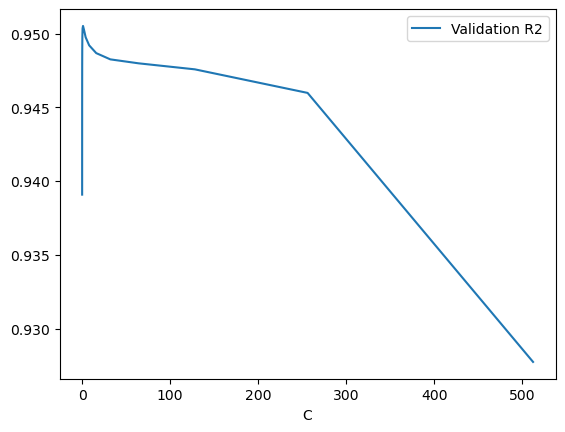

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
grid = {'C':(2.0**np.arange(-10,10))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')

In [15]:
grid_results.sort_values('Validation R2', ascending = False).head()

,C,Validation R2
10,1.00,0.950521
9,0.50,0.950348
11,2.00,0.950283
8,0.25,0.949786
12,4.00,0.949748


<AxesSubplot: xlabel='C'>

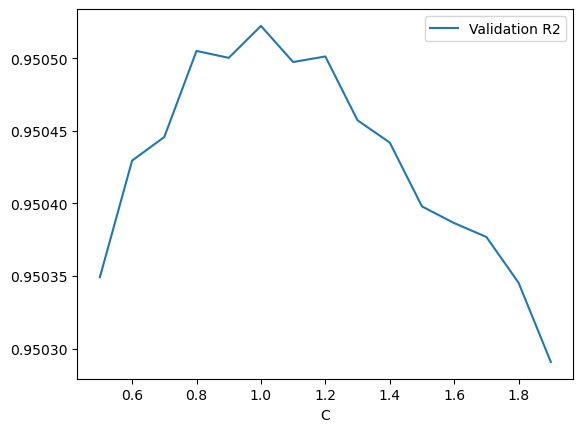

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np
grid = {'C':(np.arange(.5,2,.1))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')

In [ ]:
from sklearn.svm import SVC #I avoided using this earlier as sklearn.svm documentation does not reccomend it for large datasets or feature spaces
svc = SVC()
svc.fit(Z_train,y_train)
svc.score(Z_test,y_test) #this ran for around an hour with no results (maybe it could work after LSA) Tried it with LSA still no success

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    245063
           1       0.66      0.46      0.54     16162

    accuracy                           0.95    261225
   macro avg       0.81      0.72      0.76    261225
weighted avg       0.95      0.95      0.95    261225



(array([0.5, 1.5]), [Text(0, 0.5, 'sincere'), Text(0, 1.5, 'insincere')])

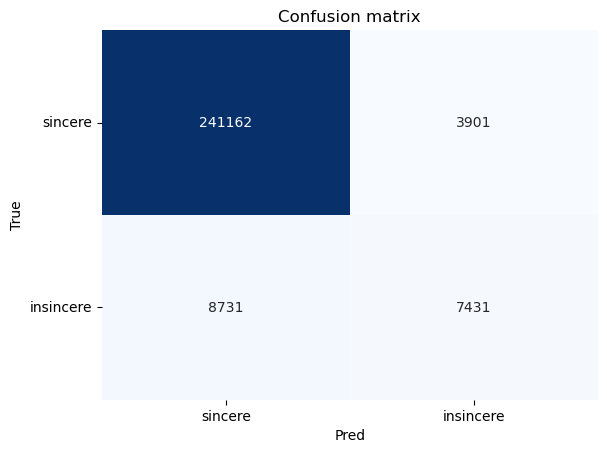

In [11]:
svm = LinearSVC() # from https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794
svm.fit(tfidf_train,y_train)
pred = svm.predict(tfidf_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=['sincere','insincere'], 
       yticklabels=['sincere','insincere'], title="Confusion matrix")
plt.yticks(rotation=0)